c:\Users\hdspl\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


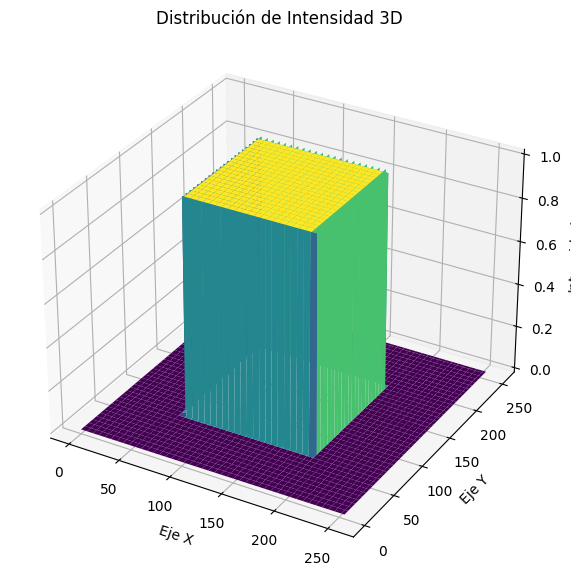

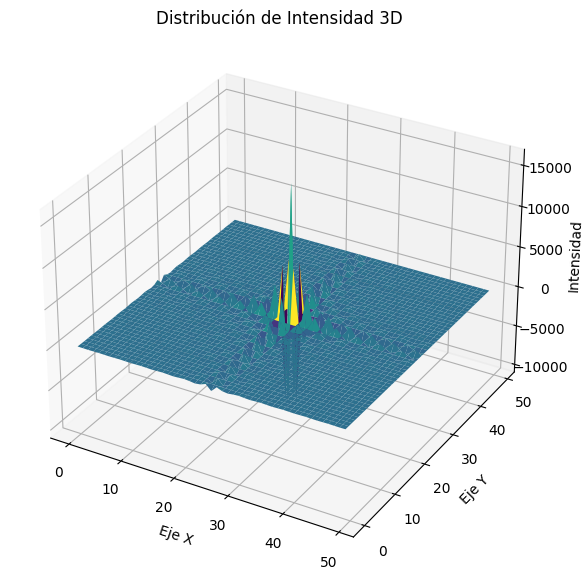

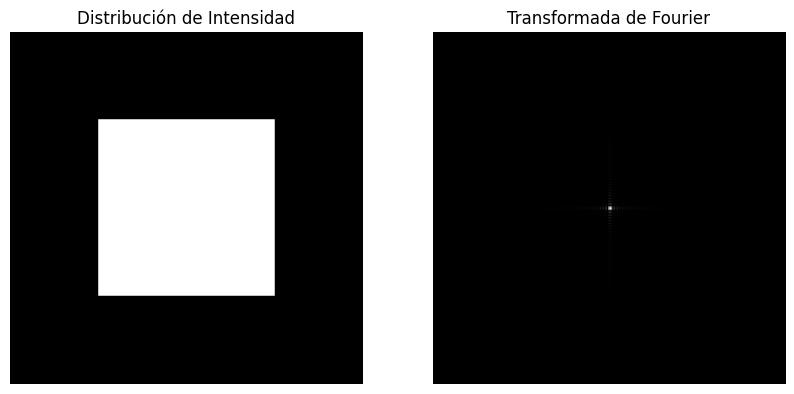

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, fftshift

# Tamaño de la imagen
size = 256

# Crear un cuadrado blanco en el espacio
square = np.zeros((size, size))
square[size // 4:3 * size // 4, size // 4:3 * size // 4] = 1

# Coordenadas en el espacio x, y
x = np.arange(size)
y = np.arange(size)
X, Y = np.meshgrid(x, y)

# Calcular la transformada de Fourier 2D
fourier = fftshift(fft2(square))

# Especifica el tamaño del recorte
cut_size = 50  # Tamaño del recorte centrado

# Recortar la parte central
center_x, center_y = size // 2, size // 2
cropped_fourier = fourier[center_x - cut_size // 2:center_x + cut_size // 2, center_y - cut_size // 2:center_y + cut_size // 2]
Furier = np.abs(cropped_fourier)
Furier = Furier/np.max(Furier)

u = np.arange(cut_size)
v = np.arange(cut_size)
U, V = np.meshgrid(u, v)

# Gráfico 3D de la intensidad en el espacio (x, y, z)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, square, cmap='viridis')

ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Intensidad')
ax.set_title('Distribución de Intensidad 3D')

fig = plt.figure(figsize=(10, 7))
bx = fig.add_subplot(111, projection='3d')
bx.plot_surface(U, V, cropped_fourier, cmap='viridis')

bx.set_xlabel('Eje X')
bx.set_ylabel('Eje Y')
bx.set_zlabel('Intensidad')
bx.set_title('Distribución de Intensidad 3D')

plt.show()

# Crear figuras
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico del cuadrado blanco
axes[0].imshow(square, cmap='gray')
axes[0].set_title('Distribución de Intensidad')
axes[0].axis('off')

# Gráfico de la transformada de Fourier
axes[1].imshow(np.abs(fourier), cmap='gray')
axes[1].set_title('Transformada de Fourier')
axes[1].axis('off')

plt.show()

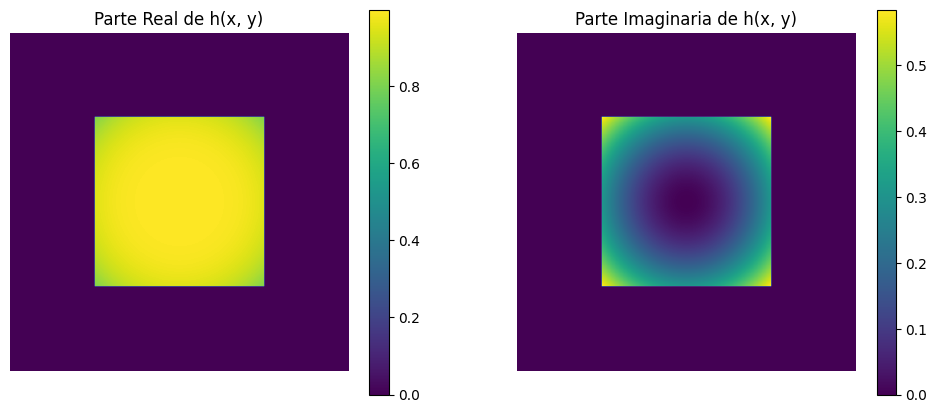

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
L_X = 1.0  # Parámetro L_X
L_Y = 1.0  # Parámetro L_Y
beta = 0.1  # Parámetro beta
size = 256  # Tamaño de la imagen

# Coordenadas en el espacio
x = np.linspace(-2 * L_X, 2 * L_X, size)
y = np.linspace(-2 * L_Y, 2 * L_Y, size)
X, Y = np.meshgrid(x, y)

# Calcular la función de fase exponencial cuadrática
phase = np.exp(1j * np.pi * beta * (X**2 + Y**2))

# Crear la función de rectángulo
rect_x = np.where(np.abs(X) <= L_X, 1, 0)
rect_y = np.where(np.abs(Y) <= L_Y, 1, 0)

# Multiplicar la fase por los rectángulos
result = rect_x * rect_y * phase

# Graficar la parte real e imaginaria
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.imshow(np.real(result), cmap='viridis')
plt.title('Parte Real de h(x, y)')
plt.colorbar()
plt.axis('off')

plt.subplot(122)
plt.imshow(np.imag(result), cmap='viridis')
plt.title('Parte Imaginaria de h(x, y)')
plt.colorbar()
plt.axis('off')

plt.show()


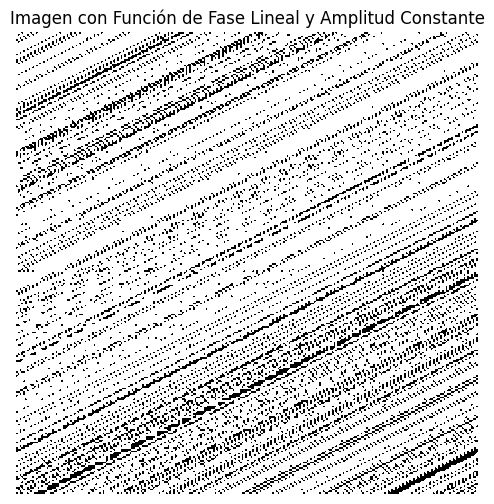

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Tamaño de la imagen
size = 256

# Parámetros de la fase
f_X = 0.1  # Componente X de la frecuencia espacial
f_Y = 0.2  # Componente Y de la frecuencia espacial

# Coordenadas en el espacio
x = np.linspace(0, 1, size)
y = np.linspace(0, 1, size)
X, Y = np.meshgrid(x, y)

# Calcular la imagen con función de fase lineal y amplitud constante
amplitud = 1.0  # Amplitud constante
fase = np.exp(1j * 2 * np.pi * (f_X * X + f_Y * Y))
imagen = amplitud * fase

# Graficar la imagen
plt.figure(figsize=(6, 6))
plt.imshow(np.abs(imagen), cmap='gray')
plt.title('Imagen con Función de Fase Lineal y Amplitud Constante')
plt.axis('off')
plt.show()


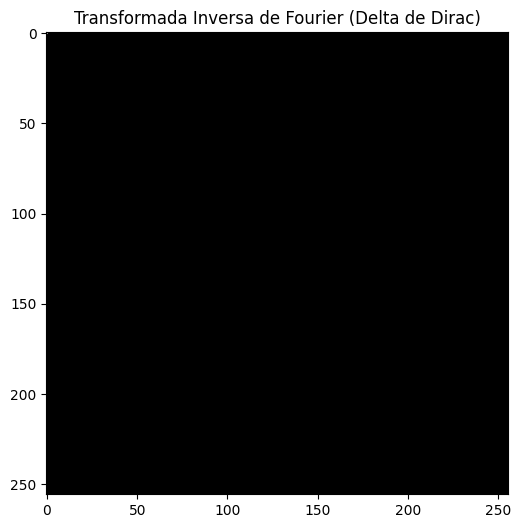

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Tamaño de la imagen (espacio espacial)
size = 256

# Crear una señal constante en el dominio de la frecuencia (un rectángulo)
constant_signal = np.ones((size, size))

# Calcular la transformada inversa de Fourier (delta de Dirac)
spatial_signal = np.fft.ifft2(constant_signal)

# Graficar la delta de Dirac en el dominio espacial
plt.figure(figsize=(6, 6))
plt.imshow(np.abs(spatial_signal), cmap='gray')
plt.title('Transformada Inversa de Fourier (Delta de Dirac)')
plt.show()



In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, fftshift

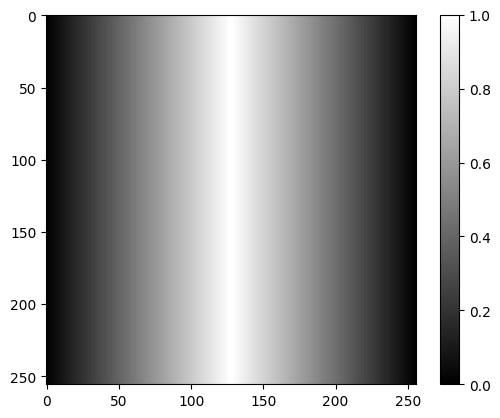

In [7]:
# Tamaño de la imagen
ancho = 128
alto = 256

# Crear una cuadrícula de coordenadas
x = np.linspace(0, 1, ancho)
y = np.linspace(0, 1, alto)
X, Y = np.meshgrid(x, y)

imagensv = np.concatenate((X,1 - X), axis=1)
plt.imsave('imagensuave.png', imagensv, cmap='gray')

# Mostrar la imagen
plt.imshow(imagensv, cmap='gray', vmin=0, vmax=1)
plt.colorbar()
plt.show()


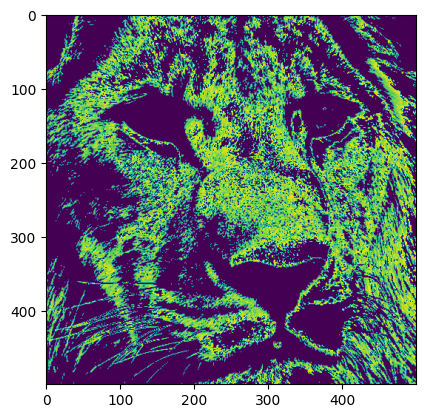

In [8]:
from PIL import Image

target_intensity = np.array(Image.open('Target_Images/leon.jpg'))
target_intensity = target_intensity[:,:,0]

parte = 5 #multiplo de 255
Imin = np.min(target_intensity)
Imax = np.max(target_intensity)
h = (Imax - Imin)/parte

a,b = target_intensity.shape
TargetI = np.zeros((a, b, parte))

for i in range(0,4,1):
    a = Imin + i*h
    b = Imin + (i+1)*h
    mascara = (target_intensity >= a) & (target_intensity <= b)
    # Crear las tres matrices dividiendo la matriz original con las máscaras
    TargetI[:,:,i] = np.where(mascara, target_intensity, 0)

plt.figure()
plt.imshow(TargetI[:,:,2])
plt.show()

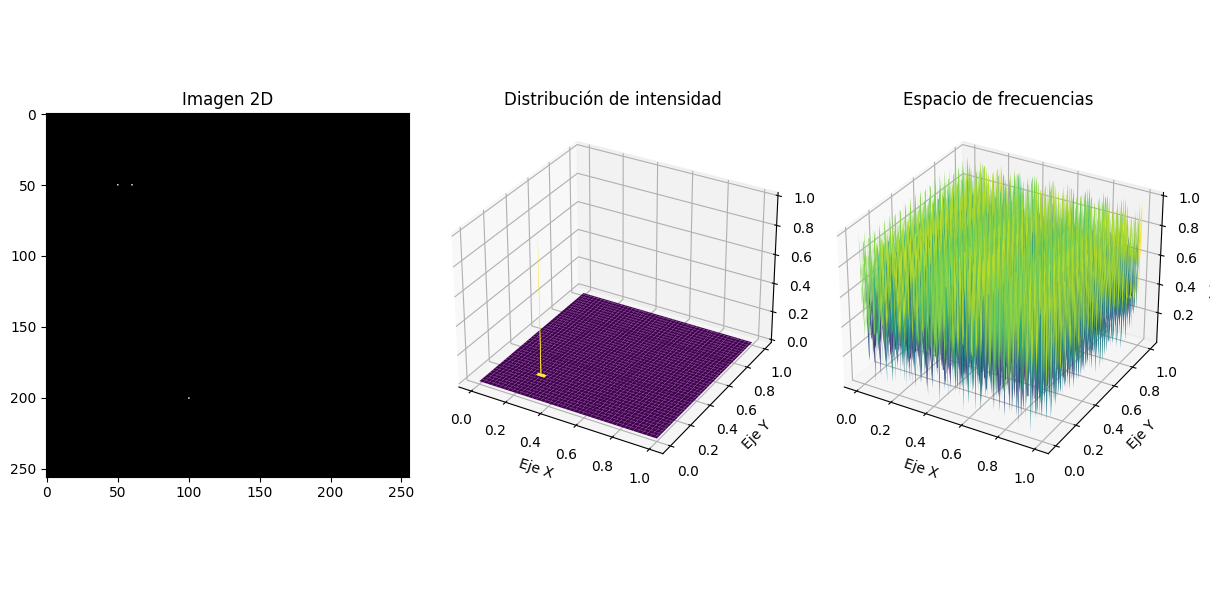

In [9]:
# Tamaño de la matriz
filas = 256
columnas = 256
x = np.linspace(0, 1, filas)
y = np.linspace(0, 1, columnas)
X, Y = np.meshgrid(x, y)
matriz_constante = 1 - np.ones((filas, columnas))
matriz_constante[50,50] = 1
matriz_constante[50,60] = 1
matriz_constante[200,100] = 1

fourier = fftshift(fft2(matriz_constante))
Furier = np.abs(fourier)
Furier = Furier/np.max(Furier)
# Crear una figura con tres subgráficos
f, axs = plt.subplots(1, 3, figsize=(12, 6))

# Subgráfico 1: Imagen 2D
axs[0].imshow(matriz_constante, cmap='gray', vmin=0, vmax=1)
axs[0].set_title('Imagen 2D')
axs[1].set_axis_off()
axs[2].set_axis_off()
# Subgráfico 2: Superficie 3D
ax = f.add_subplot(1, 3, 2, projection='3d')
ax.plot_surface(X, Y, matriz_constante, cmap='viridis')
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Intensidad')
ax.set_title('Distribución de intensidad')

# Subgráfico 3: Superficie 3D con inverso
bx = f.add_subplot(1, 3, 3, projection='3d')
bx.plot_surface(X, Y, Furier, cmap='viridis')
bx.set_xlabel('Eje X')
bx.set_ylabel('Eje Y')
bx.set_zlabel('Intensidad')
bx.set_title('Espacio de frecuencias')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar la figura
plt.show()


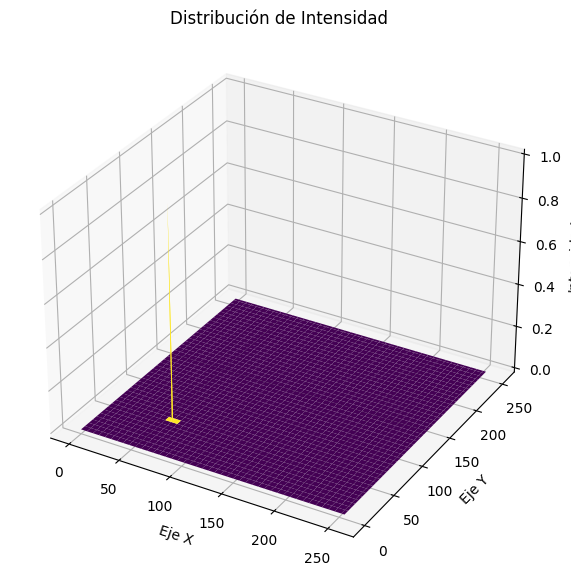

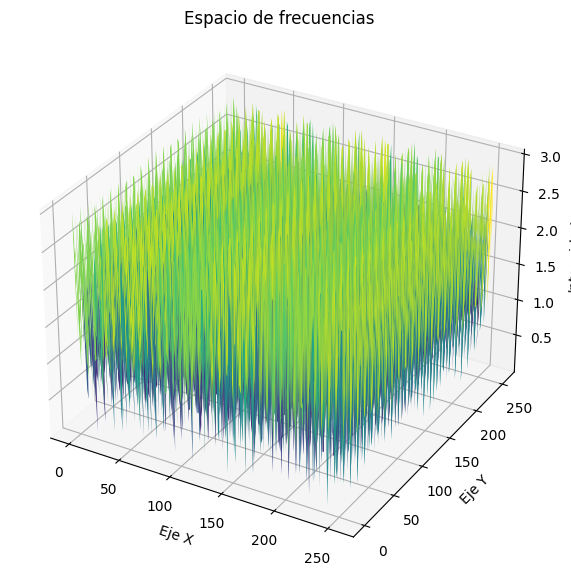

In [10]:
# Tamaño de la imagen
size = 256

# Coordenadas en el espacio x, y
x = np.arange(size)
y = np.arange(size)
X, Y = np.meshgrid(x, y)

# Calcular la transformada de Fourier 2D
fourier = fftshift(fft2(matriz_constante))

# Especifica el tamaño del recorte
cut_size = 16  # Tamaño del recorte centrado

# Recortar la parte central
center_x, center_y = size // 2, size // 2
cropped_fourier = fourier[center_x - cut_size // 2:center_x + cut_size // 2, center_y - cut_size // 2:center_y + cut_size // 2]
Furier = np.abs(cropped_fourier)
Furier = Furier/np.max(Furier)

u = np.arange(cut_size)
v = np.arange(cut_size)
U, V = np.meshgrid(u, v)

# Gráfico 3D de la intensidad en el espacio (x, y, z)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, matriz_constante, cmap='viridis')

ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Intensidad')
ax.set_title('Distribución de Intensidad')

fig = plt.figure(figsize=(10, 7))
bx = fig.add_subplot(111, projection='3d')
bx.plot_surface(X, Y, np.abs(fourier), cmap='viridis')

bx.set_xlabel('Eje X')
bx.set_ylabel('Eje Y')
bx.set_zlabel('Intensidad')
bx.set_title('Espacio de frecuencias')

plt.show()


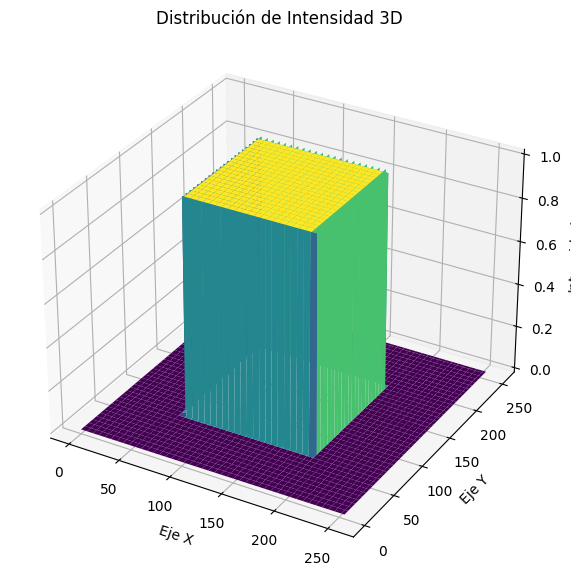

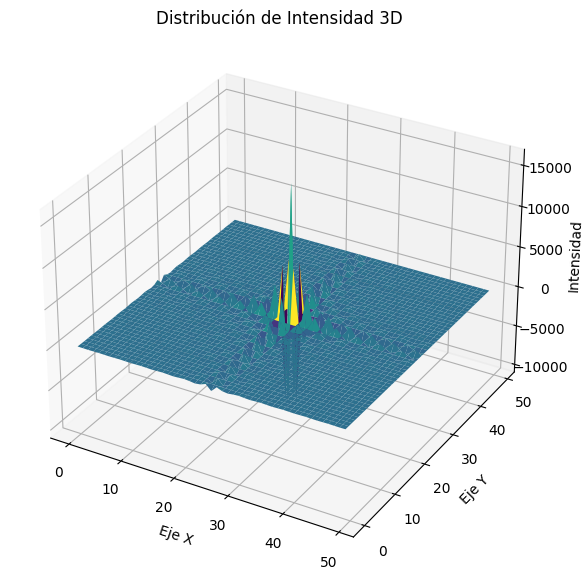

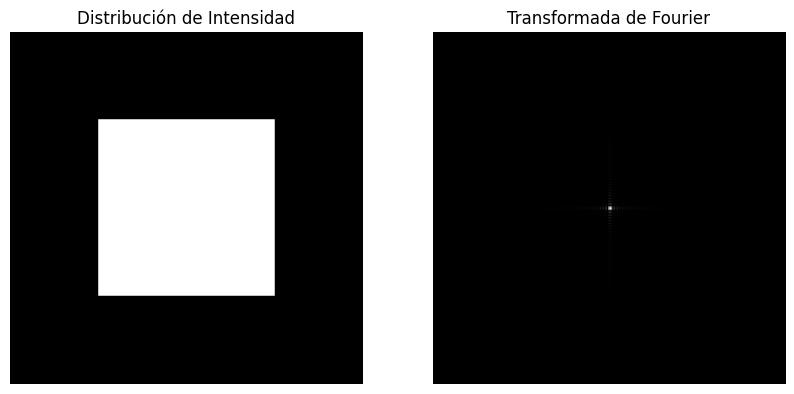

In [11]:
# Tamaño de la imagen
size = 256

# Crear un cuadrado blanco en el espacio
square = np.zeros((size, size))
square[size // 4:3 * size // 4, size // 4:3 * size // 4] = 1

# Coordenadas en el espacio x, y
x = np.arange(size)
y = np.arange(size)
X, Y = np.meshgrid(x, y)

# Calcular la transformada de Fourier 2D
fourier = fftshift(fft2(square))

# Especifica el tamaño del recorte
cut_size = 50  # Tamaño del recorte centrado

# Recortar la parte central
center_x, center_y = size // 2, size // 2
cropped_fourier = fourier[center_x - cut_size // 2:center_x + cut_size // 2, center_y - cut_size // 2:center_y + cut_size // 2]
Furier = np.abs(cropped_fourier)
Furier = Furier/np.max(Furier)

u = np.arange(cut_size)
v = np.arange(cut_size)
U, V = np.meshgrid(u, v)

# Gráfico 3D de la intensidad en el espacio (x, y, z)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, square, cmap='viridis')

ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Intensidad')
ax.set_title('Distribución de Intensidad 3D')

fig = plt.figure(figsize=(10, 7))
bx = fig.add_subplot(111, projection='3d')
bx.plot_surface(U, V, cropped_fourier, cmap='viridis')

bx.set_xlabel('Eje X')
bx.set_ylabel('Eje Y')
bx.set_zlabel('Intensidad')
bx.set_title('Distribución de Intensidad 3D')

plt.show()

# Crear figuras
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico del cuadrado blanco
axes[0].imshow(square, cmap='gray')
axes[0].set_title('Distribución de Intensidad')
axes[0].axis('off')

# Gráfico de la transformada de Fourier
axes[1].imshow(np.abs(fourier), cmap='gray')
axes[1].set_title('Transformada de Fourier')
axes[1].axis('off')

plt.show()